# Lista de exercícios extra - Machine Learning
Daniel Jacob Tonn
## Modelos baseados em energia (EBM)

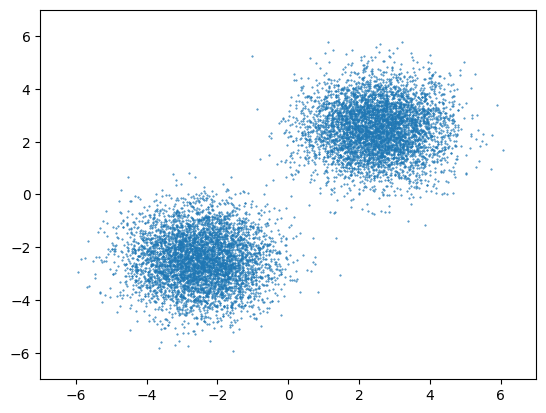

In [11]:
import torch
import matplotlib.pyplot as plt

# Definir o dispositivo para CPU, mesmo que CUDA esteja disponível
device = torch.device('cpu')

import torch.nn as nn
import torch_sgld
import seaborn as sns

N = 10000
d = 2
data = torch.randn((int(N/2), d), device=device) + 2.5
data2 = torch.randn((int(N/2), d), device=device) - 2.5
data = torch.cat((data, data2), dim=0)

# Converter dados de volta para a CPU para plotagem
data = data.cpu().numpy()

plt.scatter(data[:,0], data[:,1], s=0.2)
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()


**1.** Considere as a amostras da distribuição acima, contidas na variável 'data'. Complete o código abaixo para implementar um modelo baseado em energia (EBM) que amostre aproximadamente da distribuição subjacente a esses dados. Depois de treinar o modelo, amostre do EBM e compare o resultado contra o scatterplot acima. Analise o efeito de mudar a quantidade de iterações de SGLD por época. Além disso, a implementação abaixo usa cadeias 'persistentes' entre épocas --- i.e., o estado final da última época é o inicial da atual. Qual o efeito de inicializar aleatoriamente a cadeia em cada iteração? E de inicializá-las nos pontos observados em 'data'?

Epoch 0, Loss: 0.005836844444274902
Epoch 1000, Loss: 1.3732805252075195
Epoch 2000, Loss: 0.15390920639038086
Epoch 3000, Loss: -0.3451046943664551
Epoch 4000, Loss: -0.35621070861816406
Epoch 5000, Loss: -0.35892677307128906
Epoch 6000, Loss: -0.043061256408691406
Epoch 7000, Loss: -0.2728395462036133
Epoch 8000, Loss: 0.05256032943725586
Epoch 9000, Loss: -0.3145446479320526


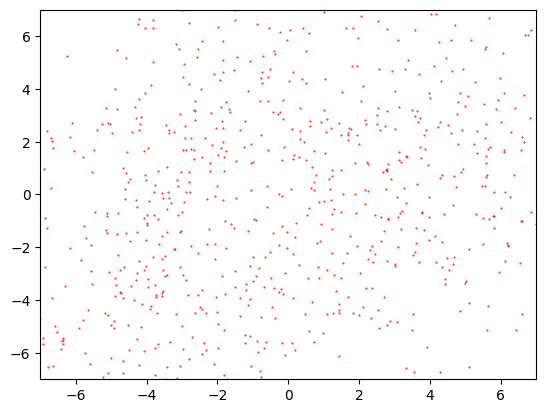

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_sgld import SGLD
import matplotlib.pyplot as plt

# Define the model parameters
h = 10
d = 2  # Assuming d is 2 since you are using 2D data
N = 1000  # Number of samples

# Define the model
E = nn.Sequential(
    nn.Linear(d, h),
    nn.ReLU(),
    nn.Linear(h, h),
    nn.ReLU(),
    nn.Linear(h, 1)
)

# Generate synthetic data
data = torch.randn((N, d)) * 5.0

# Training parameters
max_iter = 10000
chain_length = 10

# Define the optimizer and sampler
x = torch.randn((N, 2)) * 5.0
x.requires_grad = True
optimizer = optim.Adam(E.parameters(), lr=0.01)
sampler = SGLD([x], lr=0.01)

# Training loop
for i in range(max_iter):
    for _ in range(chain_length):
        sampler.zero_grad()
        potential = E(x).squeeze()
        potential.sum().backward()
        sampler.step()
    
    optimizer.zero_grad()
    loss = E(data).mean() - E(x.detach()).mean()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        print(f'Epoch {i}, Loss: {loss.item()}')

# Plot the generated samples
samples = x.detach().numpy()
plt.scatter(samples[:, 0], samples[:, 1], s=0.2, color='red')
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()


Alterando as iterações do SGLD:

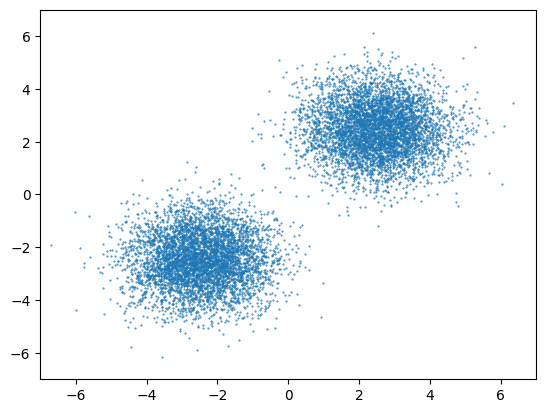

In [13]:
# Gerar dados
N = 10000
d = 2
data = torch.randn((int(N/2), d)) + 2.5
data2 = torch.randn((int(N/2), d)) - 2.5
data = torch.cat((data, data2), dim=0)
plt.scatter(data[:, 0], data[:, 1], s=0.2)
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()
# Definir a rede de energia
h = 10
E = nn.Sequential(
nn.Linear(d, h),
nn.ReLU(),
nn.Linear(h, h),
nn.ReLU(),
nn.Linear(h, 1)
)



Vamos agora usar a reinicialização aleatória com novas amostras

Epoch 0, Loss: 0.03522831201553345


<function matplotlib.pyplot.show(close=None, block=None)>

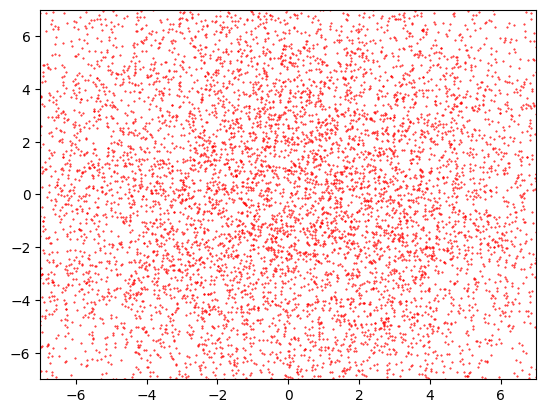

In [14]:
# Definir a rede de energia
h = 10
E = nn.Sequential(
nn.Linear(d, h),
nn.ReLU(),
nn.Linear(h, h),
nn.ReLU(),
nn.Linear(h, 1)
)
# Configurar os parâmetros de treinamento
max_iter = 1000
optimizer = torch.optim.Adam(E.parameters(), lr=0.01)
sampler = torch_sgld.SGLD([x], lr=0.01)
chain_length = 10
for epoch in range(max_iter):
# Inicializando as amostras para SGLD aleatoriamente
        x = torch.randn((N, 2)) * 5.0
        x.requires_grad = True
        for _ in range(chain_length):
            sampler.zero_grad()
            potential = E(x).squeeze()
            potential.sum().backward()
            sampler.step()
        optimizer.zero_grad()
        energy_data = E(data).mean()
        energy_model = E(x.detach()).mean()
        loss = energy_data - energy_model
        loss.backward()
        optimizer.step()
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')
# Plotar as amostras geradas
samples = x.detach().cpu().numpy()
plt.scatter(samples[:, 0], samples[:, 1], s=0.2, color='red')
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show

Inicializando o como os dados obervados:

Epoch 0, Loss: 0.0
Epoch 1000, Loss: 0.0
Epoch 2000, Loss: 0.0
Epoch 3000, Loss: 0.0
Epoch 4000, Loss: 0.0
Epoch 5000, Loss: 0.0
Epoch 6000, Loss: 0.0
Epoch 7000, Loss: 0.0
Epoch 8000, Loss: 0.0
Epoch 9000, Loss: 0.0


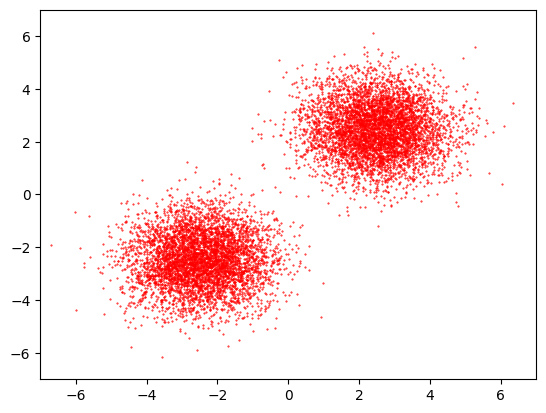

In [15]:
# Definir a rede de energia
h = 10
E = nn.Sequential(
nn.Linear(d, h),
nn.ReLU(),
nn.Linear(h, h),
nn.ReLU(),
nn.Linear(h, 1)
)
# Configurar os parâmetros de treinamento
max_iter = 10000
optimizer = torch.optim.Adam(E.parameters(), lr=0.01)
sampler = torch_sgld.SGLD([x], lr=0.01)
chain_length = 10
# Inicializando as amostras para SGLD com os dados observados
x = data.clone().detach()
x.requires_grad = True
for epoch in range(max_iter):
    for _ in range(chain_length):
        sampler.zero_grad()
        potential = E(x).squeeze()
        potential.sum().backward()
        sampler.step()
    optimizer.zero_grad()
    energy_data = E(data).mean()
    energy_model = E(x.detach()).mean()
    loss = energy_data - energy_model
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

samples = x.detach().cpu().numpy()
plt.scatter(samples[:, 0], samples[:, 1], s=0.2, color='red')
plt.xlim([-7, 7])
plt.ylim([-7, 7])
plt.show()

**2.** O gradiente da verossimilhança para um EBM ($p_\theta \propto \text{exp}\{-E_\theta(x)\} $) é equivalente a  seguinte expressão:
\begin{equation}
\sum_{n=1}^{N} \bigg( - \nabla_\theta E_{\theta}(x_n) + \mathbb{E}_{x \sim p_{\theta}}[\nabla_\theta E(x)] \bigg),
\end{equation} 
onde $x_1, \ldots, x_N$ são os dados observados. Prove.


Claro, aqui está a mesma explicação reescrita em LaTeX:

Como $p_\theta \propto \text{exp}\{-E_\theta(x)\}$, a log-verossimilhança para um dado $x$ é:
$$
\log p_\theta(x) = \log \frac{\exp\{-E_{\theta}(x)\}}{Z(\theta)} = -E_{\theta}(x)-\log Z(\theta)
$$
onde $Z(\theta)$ é a função de partição, dada por $Z(\theta) = \sum_{x^\prime} \exp\{ -E_{\theta}(x) \}$.

Daí, o gradiente dessa log-verossimilhança com relação a $\theta$ é:

$$
\nabla_\theta \log p_\theta(x) = \nabla_\theta (-E_{\theta}(x)-\log Z(\theta))
$$
$$
\nabla_\theta \log p_\theta(x) = -\nabla_\theta E_{\theta}(x) + \frac{1}{Z(\theta)} \sum_{x^\prime} \exp\{ -E_{\theta}(x^\prime) \} \nabla_\theta E_{\theta}(x^\prime)
$$
$$
\nabla_\theta \log p_\theta(x) = -\nabla_\theta E_{\theta}(x) + \mathbb{E}_{x^\prime \sim p_\theta}[\nabla_\theta E_{\theta}(x^\prime)]
$$

Agora, considerando um conjunto de $N$ dados independentes e identicamente distribuídos $\{ x_1, x_2, \ldots, x_N \}$, a log-verossimilhança conjunta é:
$$
\log p_\theta(x_1, x_2, \ldots, x_N) = \sum_{n=1}^{N} \log p_\theta(x_n)
$$

O gradiente disso é a soma dos gradientes, e pela expressão que encontramos antes:
$$
\nabla_\theta \log p_\theta(x_1, x_2, \ldots, x_N) = \sum_{n=1}^{N} \nabla_\theta \log p_\theta(x_n)
$$
$$
\nabla_\theta \log p_\theta(x_1, x_2, \ldots, x_N) = \sum_{n=1}^{N} \left( -\nabla_\theta E_{\theta}(x_n) + \mathbb{E}_{x^\prime \sim p_\theta}[\nabla_\theta E_{\theta}(x^\prime)] \right)
$$

Exatamente a expressão dada na questão.


### Referências potencialmente úteis:

1. **Bayesian Learning via stochastic gradient Langevin dynamics**. Welling & Teh, ICML 2011.
2. **How to train your Energy-based models**. Song  & Kingma, ArXiV:2101.03288.